In [1]:
import pandas as pdw
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()


/home/alexxgo21/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


query : buat 2 paragraf cerita anak

In [2]:
txts = [
"Di sebuah desa kecil yang dikelilingi oleh hutan hijau, tinggal seorang anak bernama Mia yang penuh dengan keingintahuan dan semangat petualangan. Suatu hari, Mia mendengar cerita dari neneknya tentang harta tersembunyi di dalam hutan yang hanya dapat ditemukan oleh orang yang memiliki hati yang tulus. Terpikat oleh cerita tersebut, Mia memutuskan untuk menjelajahi hutan tersebut dengan harapan menemukan petualangan yang menarik. Dengan ransel kecil di punggungnya dan senyum cerah di wajahnya, Mia memulai perjalanan ajaibnya menuju ke dalam hutan yang misterius. Setibanya di dalam hutan, Mia bertemu dengan berbagai makhluk ajaib, seperti burung-burung berbicara dan kelinci-kelinci kecil yang bisa bermain musik. Mereka membantu Mia melewati rintangan dan memberikan petunjuk untuk menemukan harta tersembunyi. Melalui perjalanan ini, Mia belajar tentang persahabatan, keberanian, dan kebaikan hati. Akhirnya, ketika Mia menemukan harta tersembunyi tersebut, dia menyadari bahwa kebahagiaan sejati terletak pada petualangan dan pengalaman bersama teman-teman yang ditemuinya di dalam hutan ajaib itu."
,
"Di suatu desa kecil, tinggallah seorang anak laki-laki bernama Koko. Koko adalah seorang anak yang penuh kegembiraan dan keingintahuan. Setiap pagi, Koko selalu bangun dengan senyum ceria, siap menjelajahi dunia di sekitar desanya. Satu hari, Koko menemukan sebuah buku ajaib di balik rak buku neneknya. Dengan penuh semangat, Koko membaca buku tersebut dan tiba-tiba terbawa ke dalam dunia fantasi yang penuh warna. Di sana, ia bertemu dengan makhluk ajaib dan menjalani petualangan seru yang mengajarkannya tentang keberanian, persahabatan, dan kebaikan hati. Sementara itu, di desa sebelah, hiduplah seorang gadis kecil bernama Siti. Siti adalah seorang penyayang binatang dan selalu berusaha melindungi hewan-hewan di sekitarnya. Setiap sore, Siti menghabiskan waktunya di taman bermain desa, di mana ia menjalani petualangan kecil bersama teman-temannya yang setia, yaitu kucing jalanan dan burung-burung kecil. Dengan keceriaan dan kebaikan hatinya, Siti membantu hewan-hewan yang membutuhkan pertolongan. Suatu hari, Siti menemukan burung kecil yang terluka di taman bermain. Dengan penuh kasih sayang, ia merawat burung tersebut dan bersama-sama teman-temannya, mereka membentuk sebuah kelompok kecil yang menjaga kesejahteraan hewan di desa mereka."
,
"Di sebuah desa kecil yang dikelilingi oleh hutan hijau, tinggallah seorang anak kecil bernama Aria. Aria adalah seorang gadis yang penuh semangat dan selalu penasaran dengan keajaiban alam di sekitarnya. Setiap pagi, dia bangun dengan senyum ceria dan bersiap untuk petualangan baru. Suatu hari, Aria menemukan sebuah buku tua di loteng rumah neneknya yang penuh dengan cerita-cerita dongeng. Dengan mata berbinar, ia membaca kisah-kisah fantastis tentang makhluk ajaib, petualangan di dunia dongeng, dan persahabatan yang kuat. Dengan buku itu sebagai teman setianya, Aria memulai petualangan magisnya sendiri, menjelajahi dunia sekitarnya dengan imajinasinya yang tak terbatas. Ketika matahari terbenam, Aria kembali ke rumah dengan hati penuh kegembiraan. Dia bercerita kepada keluarganya tentang petualangan hari itu, membagikan keajaiban-keajaiban yang dia temukan dan pelajaran yang dia dapat dari buku ajaib neneknya. Desa kecil itu pun menjadi tempat penuh keceriaan dan inspirasi, karena Aria membagikan keajaiban dunianya kepada semua orang, membawa semangat petualangan kepada setiap anak di desa tersebut."
,
"Di suatu desa kecil, tinggal seorang anak bernama Maya yang penuh dengan keceriaan. Setiap hari, Maya selalu bersama teman-temannya, mengeksplorasi keajaiban alam di sekitar desa. Suatu hari, mereka menemukan sebuah gua misterius di tengah hutan. Dengan penuh keberanian, Maya dan teman-temannya memasuki gua tersebut. Di dalamnya, mereka menemukan dunia yang penuh warna dan gemerlap, dihuni oleh makhluk-makhluk ajaib. Petualangan pun dimulai, dan Maya belajar banyak nilai kebaikan seperti kerjasama, keberanian, dan persahabatan. Di kota sebelah, hiduplah seorang anak laki-laki bernama Adi yang sangat menyukai ilmu pengetahuan. Adi sering menghabiskan waktunya di perpustakaan dan laboratorium sekolah. Suatu hari, Adi menemukan buku ajaib yang membawanya ke petualangan luar biasa di dunia fantasi. Di sana, ia bertemu dengan makhluk-makhluk fantastis dan belajar tentang keajaiban alam. Adi menyadari bahwa ilmu pengetahuan tidak hanya berada di dalam buku, tetapi juga dapat ditemukan di setiap sudut dunia ini. Dengan semangat penasaran, Adi menjelajahi dunia fantasi tersebut dan membawa pulang pengetahuan baru yang membuatnya semakin mencintai keajaiban ilmu pengetahuan."
,
"Di sebuah desa kecil yang dikelilingi oleh hutan hijau, tinggallah seorang anak bernama Aria. Aria adalah seorang gadis kecil yang penuh semangat dan selalu penasaran tentang dunia di sekelilingnya. Suatu hari, ketika sedang bermain di tepi hutan, Aria menemukan sebuah pintu rahasia yang tersembunyi di balik semak-semak. Dengan penuh keberanian, dia membuka pintu tersebut dan tiba-tiba terdampar di dunia ajaib yang penuh dengan makhluk-makhluk aneh dan pemandangan yang tak terduga. Petualangan seru pun dimulai bagi Aria, yang menemukan bahwa keberanian dan keingintahuan anak-anak dapat membuka pintu ke dunia yang penuh dengan keajaiban. Selama petualangan Aria, dia bertemu dengan berbagai teman baru, seperti burung ajaib yang bisa bicara dan seekor kelinci dengan telinga yang bisa membesar. Bersama-sama, mereka menjelajahi tempat-tempat menakjubkan, memecahkan teka-teki, dan belajar banyak hal baru. Dengan setiap langkahnya, Aria menemukan kekuatan dalam keberanian dan keingintahuannya, mengajarkan kepada teman-temannya bahwa dunia ini begitu luas dan penuh keajaiban. Akhirnya, ketika waktunya untuk kembali ke desanya tiba, Aria membawa pulang banyak cerita indah dan kenangan tak terlupakan yang akan diingatnya seumur hidup."
,
"Di sebuah desa kecil yang dikelilingi oleh hutan belantara, tinggal seorang anak laki-laki bernama Adi. Adi adalah seorang yang sangat penasaran dan penuh dengan keingintahuan. Setiap hari, ia akan pergi ke hutan untuk menjelajahi keajaiban alam yang tersembunyi di dalamnya. Salah satu teman setianya adalah seekor burung hantu bernama Hootie, yang selalu menemani Adi dalam petualangannya. Bersama-sama, mereka mengeksplorasi setiap sudut hutan, dari gua yang gelap hingga sungai yang jernih. Suatu hari, saat sedang bermain di tepi sungai, Adi dan Hootie menemukan sesuatu yang tidak biasa. Mereka menemukan sepotong batu kristal yang berkilauan di dasar sungai. Dengan penuh kegembiraan, mereka mengambil batu itu dan membawanya pulang. Ternyata, batu kristal tersebut memiliki kekuatan magis yang luar biasa. Dengan kekuatan itu, Adi dan Hootie dapat melakukan berbagai hal ajaib, seperti terbang dan berbicara dengan hewan-hewan hutan. Namun, mereka juga menyadari bahwa kekuatan itu harus digunakan dengan bijaksana, karena dapat memberikan dampak yang besar bagi alam dan lingkungan sekitar mereka. Dengan batu kristal tersebut, petualangan Adi dan Hootie di hutan semakin menarik dan penuh dengan keajaiban yang tak terduga."
,
"Di sebuah desa kecil yang dikelilingi oleh hutan yang lebat, tinggal seorang anak laki-laki bernama Amir. Amir adalah seorang anak yang penuh dengan rasa ingin tahu dan petualang. Setiap harinya, setelah pulang dari sekolah, Amir selalu menyusuri tepian hutan mencari petualangan baru. Ia sering kali memanjat pohon-pohon tinggi atau mengikuti jejak binatang hutan untuk mengetahui tempat-tempat tersembunyi yang menarik. Namun, suatu hari ketika Amir terlalu jauh masuk ke dalam hutan, ia tersesat. Dalam kegelapan hutan yang tebal, Amir merasa ketakutan, tetapi keberaniannya membawa ia untuk terus mencari jalan pulang. Di dalam hutan yang sama, tinggal seorang anak perempuan bernama Aisha. Aisha adalah seorang yang gemar menjelajahi keindahan alam. Ia selalu terpesona dengan warna-warni bunga, nyanyian burung, dan aliran sungai yang jernih. Setiap hari, Aisha berkeliling hutan dengan membawa sekadar keranjang kosong untuk memetik bunga-bunga yang indah. Suatu hari, saat sedang asyik memetik bunga, Aisha mendengar suara tangis dari kejauhan. Tanpa ragu, ia mengikuti suara itu dan menemukan Amir yang tersesat di dalam hutan. Dengan ramah, Aisha membantu Amir untuk kembali pulang ke desa mereka. Dari saat itu, Amir dan Aisha menjadi sahabat yang tak terpisahkan, menjalani petualangan-petualangan seru bersama di dalam hutan yang penuh misteri."
,
"Di sebuah desa kecil yang diapit oleh perbukitan hijau, tinggalah seorang anak laki-laki bernama Adi. Adi adalah seorang yang penuh dengan keceriaan dan rasa ingin tahu yang besar. Setiap hari, dia selalu berkeliling desa untuk menemukan petualangan baru. Suatu hari, ketika sedang bermain di hutan belantara, Adi menemukan sebuah gua yang tersembunyi di balik semak-semak. Tanpa ragu, dia memasuki gua tersebut dengan penuh kegembiraan. Di dalam gua, Adi menemukan sebuah peti tua yang berisi peta petualangan kuno. Tanpa berpikir panjang, Adi memutuskan untuk mengikuti peti tersebut dan memulai petualangan seru yang akan mengubah hidupnya. Petualangan Adi membawanya ke berbagai tempat yang menakjubkan, dari hutan yang gelap hingga puncak gunung yang tertinggi. Dia bertemu dengan berbagai makhluk fantastis dan menghadapi berbagai rintangan yang menantang. Namun, setiap rintangan yang dia hadapi menguatkan tekadnya untuk terus maju. Dengan keberanian dan ketekunan, Adi akhirnya berhasil menemukan harta karun legendaris yang selama ini dicari-cari. Kembali ke desanya, Adi tidak hanya membawa harta, tetapi juga pengalaman berharga dan kebijaksanaan yang akan menginspirasi orang-orang di sekitarnya untuk selalu berani bermimpi dan mengejar impian mereka."
,
"Di sebuah desa kecil yang terletak di tengah hutan, tinggal seorang anak laki-laki bernama Adi. Adi adalah seorang anak yang penuh dengan rasa ingin tahu dan petualangan. Setiap hari setelah pulang sekolah, Adi selalu menyempatkan waktu untuk menjelajahi hutan di sekitar desanya. Bersama dengan sahabat karibnya, seekor anjing liar bernama Bono, mereka menjelajahi setiap sudut hutan yang belum pernah mereka kunjungi sebelumnya. Di dalam hutan, mereka menemukan banyak keajaiban alam, dari bunga-bunga liar yang berwarna-warni hingga sungai kecil yang mengalir jernih di antara pepohonan rindang. Suatu hari, ketika sedang menjelajahi hutan, Adi dan Bono menemukan sebuah gua yang tersembunyi di balik semak belukar. Tanpa ragu, mereka berdua memasuki gua tersebut. Di dalam gua, mereka menemukan sesuatu yang sungguh mengejutkan: sebuah harta karun yang tersembunyi di dalam peti kayu tua. Adi merasa sangat senang dan tidak sabar untuk membuka peti tersebut. Namun, tiba-tiba mereka mendengar suara gemuruh dan getaran di dalam gua. Tanpa membuang waktu, Adi dan Bono segera berlari keluar dari gua sebelum sesuatu yang buruk terjadi. Meskipun mereka tidak membawa pulang harta karun itu, petualangan yang mereka alami hari itu akan selalu menjadi kenangan tak terlupakan bagi mereka berdua."
,
"Di sebuah desa kecil yang dikelilingi oleh hutan yang penuh misteri, tinggallah seorang anak bernama Aria. Aria adalah seorang gadis yang penuh semangat dan selalu penasaran dengan petualangan. Setiap hari, dia akan menjelajahi hutan bersama teman-temannya, mencari harta karun atau menyelamatkan hewan-hewan kecil yang terjebak. Meski kadang-kadang mereka menemui kesulitan, tetapi keberanian dan kegigihan Aria selalu menginspirasi teman-temannya untuk terus menjelajahi dunia di sekitar mereka.Suatu hari, ketika sedang bermain di tepi sungai, Aria dan teman-temannya menemukan sesuatu yang sangat menarik. Mereka menemukan sebuah gua kecil yang tersembunyi di balik semak-semak. Dengan penuh kegembiraan, mereka memutuskan untuk menjelajahi gua tersebut. Di dalam gua, mereka menemukan petualangan yang menegangkan dan banyak misteri yang belum terpecahkan. Namun, dengan keberanian dan kerjasama, Aria dan teman-temannya berhasil melewati setiap rintangan dan menemukan harta karun yang membuat mereka terkagum-kagum. Petualangan di gua itu mengajarkan kepada mereka pentingnya persahabatan, keberanian, dan kerja tim dalam menghadapi tantangan dalam hidup. Dari hari itu, Aria dan teman-temannya tahu bahwa tak ada yang tak mungkin jika mereka bersatu dan berani melangkah maju."
,
"Di sebuah desa kecil yang tersembunyi di tengah hutan, tinggallah seorang anak laki-laki bernama Adi. Adi adalah seorang yang penasaran dan penuh dengan semangat petualangan. Setiap hari, dia akan menjelajahi hutan yang luas bersama teman-temannya, mencari harta karun yang konon tersembunyi di dalamnya. Namun, suatu hari, ketika mereka sedang menjelajah, mereka tersesat di dalam hutan yang gelap dan rimbun. Tanpa kompas atau peta, mereka pun berusaha mencari jalan keluar. Adi yang selalu penuh dengan ide-ide brilian, memimpin teman-temannya untuk membuat tanda-tanda di pepohonan dengan harapan dapat menemukan jalan pulang.Saat petualangan mereka di dalam hutan berlanjut, mereka menemukan sebuah gua misterius. Dengan hati penuh keberanian, mereka memasuki gua tersebut. Di dalamnya, mereka menemukan petunjuk-petunjuk tentang harta karun yang konon berada di dalam gua tersebut. Dengan semangat yang membara, Adi dan teman-temannya menjelajahi setiap lorong gua, melewati berbagai rintangan dan teka-teki yang menghadang. Setelah perjalanan yang panjang dan penuh tantangan, akhirnya mereka menemukan harta karun yang legendaris tersebut. Namun, yang lebih berharga dari harta karun itu sendiri adalah ikatan persahabatan yang semakin kuat antara Adi dan teman-temannya, serta pengalaman petualangan yang tak terlupakan di dalam gua misterius itu."
,
"Di sebuah desa kecil yang tersembunyi di antara pegunungan hijau, tinggallah seorang anak laki-laki bernama Riko. Riko adalah anak yang ceria dan penuh dengan keingintahuan. Setiap hari, dia akan keluar dari rumahnya untuk menjelajahi hutan di sekitar desa, menemukan keajaiban alam, dan berteman dengan binatang-binatang liar yang hidup di sana. Namun, suatu hari, ketika Riko sedang asyik bermain, dia tersesat di dalam hutan yang lebat. Tanpa memperhitungkan waktu, Riko terus berjalan mencari jalan pulang, dan di tengah kegelapan hutan, dia menemukan sebuah gua misterius yang tersembunyi di balik semak-semak.Di dalam gua, Riko menemukan sesuatu yang membuatnya terpana. Sebuah lampu ajaib bercahaya terang terpampang di depannya. Tanpa ragu, Riko mengambil lampu itu dan seketika terdengar suara dari dalam lampu yang menyapanya. 'Halo, anak baik. Aku adalah jin dari lampu ajaib ini. Karena kamu telah menemukan dan membebaskan aku, aku akan memberikan padamu tiga keinginan,' ucap jin itu. Riko tidak percaya pada awalnya, namun setelah mencoba untuk mengucapkan keinginan pertamanya, dia terkejut ketika keinginannya itu langsung terwujud di hadapannya. Dengan penuh kegembiraan, Riko pun mulai merencanakan keinginan-keinginan berikutnya, tapi pada akhirnya, dia menyadari bahwa petualangan sejati adalah ketika dia bersama keluarga dan teman-temannya di desa. Dengan hati yang penuh rasa syukur, Riko meminta kepada jin untuk membantunya kembali pulang ke desanya, dan dari situ dia belajar bahwa petualangan terbesar adalah saat bersama orang-orang yang dicintainya."
,
"Di sebuah kota kecil yang damai, tinggal seorang gadis kecil bernama Maya. Maya adalah anak yang penuh dengan imajinasi dan keingintahuan. Setiap hari, dia akan menemukan cara baru untuk mengeksplorasi dunia di sekitarnya, mulai dari bermain di taman hingga menggambar lukisan yang penuh warna di atas kanvasnya. Suatu hari, Maya menemukan sebuah buku tua di rak perpustakaan kota yang membawanya ke petualangan yang menakjubkan.Buku itu membawanya ke negeri dongeng yang penuh dengan makhluk ajaib dan keajaiban. Di sana, Maya bertemu dengan peri cantik, pangeran tampan, dan binatang-binatang lucu yang berbicara. Mereka semua mengajari Maya tentang nilai-nilai seperti persahabatan, keberanian, dan kejujuran. Dengan hati yang penuh dengan kebahagiaan, Maya menjelajahi negeri dongeng itu, menemukan keajaiban baru di setiap sudutnya. Dan saat dia kembali ke rumah dengan buku itu di tangan, dia membawa pulang lebih dari sekadar cerita; dia membawa pulang pelajaran berharga yang akan dia simpan seumur hidupnya."
,
"Di tengah kota kecil yang ramah, tinggal seorang gadis kecil bernama Maya. Maya adalah seorang yang gemar membaca dan selalu penasaran dengan dunia di sekitarnya. Setiap hari setelah sekolah, Maya akan mengunjungi perpustakaan kota untuk menemukan petualangan baru dalam buku-buku yang ia baca. Suatu hari, Maya menemukan sebuah buku tua yang tersembunyi di rak belakang perpustakaan. Ternyata, buku itu adalah buku ajaib yang membawa Maya ke dunia fantasi yang luar biasa.Di dunia fantasi tersebut, Maya bertemu dengan makhluk-makhluk ajaib, seperti peri dan naga yang ramah. Mereka mengajari Maya berbagai hal baru, mulai dari sihir hingga petualangan yang mendebarkan. Bersama teman-teman barunya, Maya menjelajahi tanah-tanah yang belum pernah ia bayangkan sebelumnya. Namun, Maya juga belajar tentang nilai-nilai seperti keberanian dan persahabatan selama petualangan itu. Ketika waktunya tiba untuk kembali ke dunia nyata, Maya membawa pulang pelajaran berharga dan kenangan tak terlupakan dari petualangan magisnya."
,
"Di sebuah desa kecil yang dikelilingi oleh hutan yang lebat, tinggal seorang anak laki-laki bernama Ario. Ario adalah seorang anak yang ceria dan penuh dengan rasa ingin tahu. Setiap pagi, dia akan pergi menjelajahi hutan bersama teman-temannya. Mereka akan mencari tahu tentang flora dan fauna yang ada di sekitar mereka. Suatu hari, saat sedang bermain di hutan, Ario menemukan sebuah gua misterius yang tersembunyi di balik semak-semak. Dengan penuh keberanian, dia memasuki gua tersebut dan menemukan petualangan yang tak terduga di dalamnya.Di sisi lain desa, ada seorang gadis kecil yang bernama Maya. Maya adalah seorang anak yang penuh dengan imajinasi dan kreativitas. Dia selalu memiliki ide-ide unik untuk membuat mainan dari barang-barang yang tidak terpakai di rumahnya. Suatu hari, Maya memutuskan untuk membuat perahu kecil dari potongan-potongan kayu dan daun kering. Dia bermimpi untuk menjelajahi sungai yang mengalir di belakang rumahnya dengan perahunya sendiri. Dengan tekad yang kuat, Maya mulai membangun perahunya, dan dengan bantuan ayahnya, dia berhasil menyelesaikan proyeknya. Saat perahu kecilnya siap, Maya pun meluncurkan perahunya ke sungai dan memulai petualangan baru yang penuh dengan kegembiraan dan keajaiban."
,
"Di sebuah desa kecil yang tersembunyi di balik hutan rimba, tinggal seorang anak laki-laki bernama Adi. Adi adalah seorang anak yang penuh dengan rasa ingin tahu dan keinginan untuk menjelajahi dunia di sekitarnya. Setiap hari, setelah menyelesaikan pekerjaannya di kebun, Adi akan pergi menjelajahi hutan bersama teman-temannya. Mereka akan mencari petualangan, menemukan berbagai tumbuhan dan binatang yang menarik, serta belajar banyak hal tentang alam. Namun, suatu hari, ketika mereka sedang menjelajahi jauh ke dalam hutan, mereka tersesat dan tidak tahu jalan pulang.Sementara itu, di pinggiran desa yang sama, hidup seorang gadis kecil bernama Maya. Maya adalah seorang anak yang gemar membaca dan bermimpi menjadi penjelajah dunia. Dia sering duduk di bawah pohon mangga favoritnya, membaca buku-buku petualangan, dan membayangkan dirinya menjelajahi tempat-tempat yang jauh dan eksotis. Suatu hari, ketika sedang membaca di bawah pohon mangga itu, Maya mendengar suara teriakan dari arah hutan. Tanpa ragu, Maya memutuskan untuk mengikuti suara itu. Dan begitulah, petualangan besar Maya dan Adi pun dimulai, ketika takdir membawa mereka bersama untuk menemukan jalan pulang dan menghadapi berbagai rintangan yang menarik di dalam hutan yang misterius itu."
,
"Di sebuah desa kecil yang terletak di tepi hutan, tinggallah seorang anak laki-laki bernama Ario. Ario adalah anak yang penuh dengan keingintahuan dan semangat petualangan. Setiap hari, ia akan menjelajahi sekitar desa dan mencari hal-hal baru yang menarik. Suatu hari, ketika sedang bermain di tepi hutan, Ario menemukan sebuah gua yang tersembunyi di balik semak belukar. Dengan penuh keberanian, ia memasuki gua tersebut dan menemukan petualangan yang lebih besar dari yang pernah ia bayangkan sebelumnya.Di dalam gua, Ario bertemu dengan seekor naga kecil yang bernama Sparky. Sparky adalah naga yang ramah dan ceria, meskipun kecil namun memiliki kekuatan yang luar biasa. Mereka berdua menjadi teman baik dan menjelajahi gua tersebut bersama-sama. Selama petualangan mereka, Ario dan Sparky menemui berbagai rintangan dan teka-teki yang menarik. Bersama-sama, mereka berhasil menyelesaikan setiap tantangan dengan kecerdasan dan keberanian mereka. Setelah melewati banyak halangan, akhirnya mereka menemukan harta karun yang tersembunyi di dalam gua tersebut. Dengan senang hati, Ario dan Sparky kembali ke desa untuk menceritakan petualangan mereka kepada penduduk desa dan menjadikan cerita mereka sebagai inspirasi bagi semua anak-anak di desa tersebut."
,
"Di sebuah desa kecil yang dikelilingi oleh hutan lebat, tinggallah seorang anak laki-laki bernama Ario. Ario adalah seorang anak yang penuh dengan keingintahuan dan keberanian. Setiap hari, dia akan berpetualang ke dalam hutan bersama dengan sahabatnya, seekor tupai kecil yang diberinya nama Cici. Mereka berdua seringkali menemukan hal-hal menarik di dalam hutan tersebut, seperti bunga-bunga yang berwarna-warni dan berbagai jenis hewan yang unik. Namun, suatu hari, ketika sedang menjelajahi hutan, mereka tersesat di dalam labirin pohon yang lebat. Meskipun takut, Ario tidak menyerah. Dengan menggunakan kecerdasannya, dia berhasil menemukan jalan keluar dan menyelamatkan dirinya dan Cici.Sementara itu, di desa yang sama, ada seorang gadis kecil bernama Maya. Maya adalah seorang yang penyabar dan penuh kasih sayang. Dia memiliki kegemaran untuk merawat tanaman di kebun belakang rumahnya. Setiap hari, Maya akan bermain dengan tanaman-tanaman tersebut sambil memberi mereka perawatan yang baik. Dia percaya bahwa dengan memberikan cinta dan perhatian, tanaman-tanaman tersebut akan tumbuh dengan indah. Suatu hari, Maya menemukan sebuah benih yang tergeletak di tanah yang kering. Dengan penuh kasih sayang, Maya merawat benih tersebut dengan sungguh-sungguh. Tak lama kemudian, benih itu tumbuh menjadi bunga yang cantik dan harum, memberikan keindahan baru bagi kebun belakang rumah Maya."
,
"Di sebuah kota kecil yang dikelilingi oleh perbukitan hijau, tinggal seorang anak laki-laki bernama Ali. Ali adalah seorang pemimpi yang selalu merindukan petualangan di luar sana. Setiap pagi, sebelum sekolah dimulai, Ali akan bersepeda ke tepi danau untuk menyaksikan matahari terbit, sambil membayangkan dirinya menjelajahi dunia yang luas. Namun, suatu hari, saat sedang menikmati keindahan alam, Ali menemukan sebuah petunjuk misterius yang mengarah ke sebuah gua tersembunyi di balik pepohonan.Sementara itu, di rumah tua di pinggiran kota, hidup seorang gadis kecil bernama Maya. Maya adalah seorang penggemar buku petualangan yang selalu haus akan cerita fantastis. Setiap malam sebelum tidur, dia akan membaca buku-buku tentang prajurit pemberani, penyihir misterius, dan makhluk legenda. Namun, kehidupan Maya yang tenang berubah ketika dia menemukan sebuah buku tua yang tersembunyi di loteng rumahnya. Buku itu berisi petunjuk-petunjuk menuju sebuah harta karun hilang, dan Maya pun bersiap untuk memulai petualangan yang tak terduga bersama teman barunya, Ali."
,
"Di sebuah desa kecil yang diapit oleh gunung dan sungai, tinggal seorang anak perempuan bernama Aisha. Aisha adalah seorang penjaga alam yang tangguh dan penuh semangat. Setiap hari, dia akan menghabiskan waktunya di hutan belantara, menjaga kelestarian alam dan menjelajahi keindahan alam liar. Namun, suatu hari, ketika sedang berada di tengah hutan, Aisha menemukan seekor anak beruang kecil yang tersesat. Tanpa ragu, dia memutuskan untuk membantunya pulang ke sarangnya, meskipun itu berarti harus melewati berbagai rintangan dan bahaya di hutan.Di seberang desa, hidup seorang anak laki-laki bernama Budi. Budi adalah seorang penjelajah sungai yang ulung. Setiap kali ada kesempatan, dia akan meluncur ke sungai dengan rakit buatannya sendiri, mengeksplorasi aliran air yang berliku-liku dan menyelidiki kehidupan bawah air yang menakjubkan. Namun, suatu hari, ketika sedang menjelajahi sungai, Budi tersandung pada sebuah petunjuk kuno yang tersembunyi di balik semak belukar. Petunjuk itu mengarah pada sebuah gua misterius di tepi sungai yang konon menyimpan harta karun legendaris. Dengan penuh semangat, Budi pun memutuskan untuk mengajak Aisha dan bersama-sama mereka menjelajahi gua itu, tidak menyadari petualangan epik yang menanti mereka di dalamnya."
,
"Di tengah hutan yang lebat dan hijau, tinggal lah sekelompok hewan yang hidup berdampingan dengan damai. Mereka saling menghormati dan membantu satu sama lain. Seekor beruang bernama Benny adalah salah satu hewan yang paling ramah di hutan itu. Setiap pagi, dia akan pergi ke sungai untuk mencuci wajahnya dan bersiap-siap menjalani hari dengan ceria. Suatu hari, Benny bertemu dengan seekor anak kucing kecil yang tersesat. Tanpa ragu, Benny langsung menawarkan bantuan untuk membantu anak kucing itu menemukan ibunya. Mereka berdua menjelajahi hutan bersama, melewati sungai, dan melintasi pepohonan hingga akhirnya mereka menemukan ibu kucing yang sangat bahagia melihat anaknya selamat. Di sebuah desa kecil yang terletak di lereng bukit, hiduplah seorang anak laki-laki bernama Ali. Ali adalah anak yang penuh semangat dan penuh keingintahuan. Dia selalu ingin tahu tentang segala hal di sekitarnya dan tak pernah lelah untuk mengeksplorasi dunia di sekitarnya. Suatu hari, Ali menemukan sebuah peti tua di loteng rumahnya yang penuh dengan barang-barang kuno. Di dalam peti itu, dia menemukan sebuah peta tua yang terlihat sangat menarik. Tanpa pikir panjang, Ali memutuskan untuk mengikuti petunjuk di peta tersebut. Bersama teman-temannya, mereka memulai petualangan seru untuk menemukan harta karun yang tersembunyi. Melalui hutan belantara, gunung tinggi, dan lembah yang dalam, Ali dan teman-temannya akhirnya menemukan harta karun yang tak ternilai harganya - sebuah buku tua yang berisi cerita-cerita legendaris dari masa lampau. Dari petualangan itu, Ali belajar bahwa keberanian dan persahabatan adalah kunci untuk mencapai impian."
,
"Di sebuah desa yang tersembunyi di antara pegunungan, tinggalah seorang anak laki-laki bernama Ario. Ario adalah anak yang ceria dan penuh semangat, selalu siap menjelajahi keajaiban alam di sekitarnya. Setiap pagi, sebelum matahari terbit, Ario sudah bersiap-siap untuk mengelilingi hutan yang lebat dan sungai yang mengalir dengan jernih. Ditemani oleh sahabat setianya, seekor burung kecil bernama Piko, Ario menjelajahi tempat-tempat yang belum pernah ia kunjungi sebelumnya. Mereka menemukan berbagai hal menarik seperti bunga-bunga liar yang berwarna-warni, burung-burung langka yang berkicau indah, dan bahkan air terjun yang mempesona. Suatu hari, ketika sedang bermain di pinggiran hutan, Ario dan Piko bertemu dengan seekor rusa kecil yang tampak tersesat. Dengan penuh kebaikan hati, mereka membantu rusa kecil itu menemukan jalan pulang ke keluarganya. Rusa kecil itu, yang kemudian diberi nama Riri oleh Ario, sangat bersyukur atas bantuan mereka. Sejak hari itu, Riri menjadi sahabat baru bagi Ario dan Piko. Mereka bermain bersama setiap hari, menjelajahi keindahan alam yang mengagumkan, dan belajar banyak hal baru bersama-sama. Persahabatan mereka menjadi bukti bahwa kebaikan hati dan kepedulian selalu membuahkan kebahagiaan dan hubungan yang erat di antara makhluk hidup."
,
"Di sebuah desa kecil yang tersembunyi di balik hutan belantara, tinggal seorang anak laki-laki bernama Adit. Adit adalah seorang yang sangat ingin tahu tentang alam dan makhluk-makhluk di sekitarnya. Setiap pagi, sebelum matahari terbit, dia sudah berada di luar rumahnya, siap menjelajahi hutan yang masih tertidur. Di balik semak-semak dan pepohonan, Adit menemukan berbagai keajaiban alam, dari burung-burung yang berbunyi merdu hingga rusa-rusa yang bermain di antara rerimbunan daun. Namun, ada satu makhluk yang selalu menarik perhatiannya, seekor kelinci putih kecil yang gemar melompat-lompat di padang rumput. Setiap kali bertemu, Adit selalu menyapanya dengan lembut, dan kelinci itu pun selalu menunjukkan kebahagiaannya dengan menggerakkan ekornya yang lembut. Suatu hari, Adit bertemu dengan seorang kakek bijak yang sedang duduk di bawah pohon tua di pinggir hutan. Kakek itu tersenyum ramah dan mengajak Adit duduk bersamanya. Kakek itu bercerita tentang berbagai macam kehidupan dan pengalamannya di alam. Adit sangat antusias mendengarkan cerita kakek tersebut, dan dari situlah dia belajar banyak tentang kehidupan, persahabatan, dan pentingnya menjaga lingkungan. Sejak hari itu, Adit tidak hanya menjelajahi hutan untuk menemukan keajaiban alam, tetapi juga untuk belajar dan merawat alam serta makhluk-makhluk di dalamnya. Dan kelinci putih kecil yang menjadi teman setianya, selalu menyertainya dalam setiap petualangan di alam."
,
"Di sebuah desa kecil yang tersembunyi di balik lebatnya hutan, tinggal lah seorang anak laki-laki bernama Adam. Adam adalah anak yang penuh semangat dan selalu penasaran dengan segala hal di sekitarnya. Setiap pagi, Adam akan berlari ke tepian hutan untuk menemui teman-teman hewan peliharaannya. Bersama-sama mereka menjelajahi keajaiban alam, bermain permainan klasik seperti 'cari-cari harta karun' di antara pepohonan rimbun, dan belajar banyak hal tentang lingkungan mereka. Suatu hari, saat sedang menjelajahi sebuah gua yang tersembunyi di belakang air terjun, Adam menemukan sebuah peta misterius yang menjanjikan petualangan tak terlupakan. Dengan penuh semangat, Adam dan teman-temannya memulai perjalanan petualangan mereka, tidak menyadari bahwa petualangan itu akan membawa mereka pada penemuan yang lebih besar dari yang pernah mereka bayangkan sebelumnya. Di sisi lain kota, ada seorang gadis kecil bernama Maya. Maya adalah seorang anak yang penuh imajinasi dan senang bercerita. Setiap hari setelah pulang sekolah, Maya akan duduk di bawah pohon favoritnya di taman dan membuat cerita-cerita tentang petualangan yang menakjubkan. Dia percaya bahwa dengan imajinasi, dia bisa menjelajahi dunia yang tak terbatas. Suatu hari, saat sedang bermain di taman, Maya menemukan sebuah buku tua yang tersembunyi di balik semak-semak. Ketika dia membuka buku itu, dia menemukan halaman-halaman yang penuh dengan gambar dan cerita tentang dunia fantasi yang menakjubkan. Tanpa ragu, Maya memulai perjalanan ke dunia imajinasinya sendiri, di mana dia akan bertemu dengan makhluk-makhluk ajaib, menaklukkan rintangan yang menantang, dan belajar pelajaran berharga tentang keberanian dan persahabatan."
,
"Di sebuah kota kecil yang dikelilingi oleh perbukitan hijau, tinggal lah seorang anak perempuan bernama Sarah. Sarah adalah seorang gadis yang penuh dengan keceriaan dan keingintahuan. Setiap pagi, dia akan bangun dengan senyum cerah di wajahnya, siap untuk menjelajahi dunia di sekitarnya. Sarah selalu menemukan keajaiban di setiap sudut kota kecil itu, dari bunga-bunga yang mekar di taman hingga burung-burung yang riang di langit biru. Bersama teman-temannya, Sarah akan menghabiskan hari-harinya dengan bermain, belajar, dan mengeksplorasi dunia yang menunggunya. Di seberang kota, ada seorang anak laki-laki bernama Aryan. Aryan adalah anak yang berjiwa petualang dan selalu mencari kegembiraan di sekitarnya. Setiap kali dia melihat gunung, sungai, atau hutan, dia merasa terdorong untuk menjelajahinya. Setiap petualangan membawa Aryan pada penemuan yang menakjubkan, mulai dari fosil purba hingga jejak hewan liar yang langka. Dengan semangatnya yang tak pernah padam, Aryan terus menjelajahi dunia di sekitarnya, siap untuk menghadapi setiap tantangan yang ada di hadapannya."
,
"Di sebuah desa kecil yang tersembunyi di tengah hutan, tinggal seorang anak laki-laki bernama Koko. Koko adalah seorang anak yang penuh dengan keingintahuan dan semangat petualangan. Setiap hari, dia akan menjelajahi hutan bersama teman-temannya untuk mencari tahu lebih banyak tentang alam. Suatu hari, saat sedang bermain di pinggiran hutan, mereka menemukan sebuah gua yang tersembunyi di balik semak belukar. Dengan penuh semangat, Koko dan teman-temannya memutuskan untuk menjelajahi gua itu. Mereka berlarian masuk ke dalam gua yang gelap dan menyusuri lorong-lorong yang berliku. Di dalam gua, mereka menemukan petualangan yang menegangkan dan menyenangkan sekaligus, dan hal itu membuat mereka semakin penasaran dengan dunia di sekitar mereka. Selain itu, di desa itu juga tinggal seorang gadis kecil bernama Maya. Maya adalah seorang anak yang gemar membaca dan bercita-cita menjadi seorang penjelajah dunia. Setiap hari setelah pulang sekolah, Maya akan menyelinap ke perpustakaan desa dan memilih buku-buku petualangan untuk dibaca. Suatu hari, ketika sedang membaca sebuah buku tentang penjelajah yang menemukan harta karun di pulau terpencil, Maya merasa semakin terinspirasi untuk mengejar impian dan petualangannya sendiri. Dengan tekad yang kuat, Maya memutuskan untuk mempersiapkan diri dengan belajar banyak hal dan menjelajahi lingkungan di sekitar desanya. Dia yakin suatu hari nanti, dia juga akan menemukan petualangan yang luar biasa dan menakjubkan seperti yang selalu dia baca dalam bukunya."
,
"Di sebuah kota kecil yang damai, tinggal seorang anak perempuan bernama Mia. Mia adalah seorang yang penuh imajinasi dan selalu ingin tahu tentang hal-hal baru. Setiap hari, dia akan menemukan cara-cara kreatif untuk menghabiskan waktunya, mulai dari menggambar di buku catatannya hingga membuat rumah-rumahan dari bahan bekas. Suatu hari, Mia menemukan kotak tua yang tersembunyi di loteng rumah neneknya. Dengan penuh rasa ingin tahu, Mia membuka kotak itu dan menemukan berbagai mainan kuno di dalamnya. Dengan mainan-mainan itu, Mia memulai petualangan magis di dunia imajinasinya yang penuh warna dan keajaiban. Sementara itu, di seberang kota, ada seorang anak laki-laki bernama Ali. Ali adalah seorang anak yang gemar menjelajahi alam dan berteman dengan binatang-binatang liar. Setiap hari, dia akan pergi ke hutan di belakang rumahnya untuk berpetualang dan menemukan keajaiban alam. Suatu hari, ketika sedang menjelajahi hutan, Ali menemukan sarang burung kecil yang terlantar. Tanpa ragu, Ali merawat burung-burung itu dan membawa mereka pulang. Dari situlah, Ali memulai petualangan baru dalam menjaga dan merawat binatang-bintang kecil, serta belajar banyak tentang tanggung jawab dan kepedulian terhadap alam sekitarnya."
,
"Di sebuah desa kecil yang tersembunyi di tengah hutan, tinggal seorang anak laki-laki bernama Riko. Riko adalah seorang anak yang penuh dengan keingintahuan dan semangat petualangan. Setiap hari, dia akan berkeliling hutan untuk menjelajahi keindahan alam dan mencari petualangan baru. Suatu hari, ketika sedang berjalan-jalan di hutan, Riko menemukan sebuah gua misterius yang belum pernah dia lihat sebelumnya. Dengan penuh keberanian, dia memasuki gua tersebut dan menemukan petualangan yang menakjubkan di dalamnya. Di dalam gua tersebut, Riko bertemu dengan seekor naga kecil yang sedang terluka. Dengan penuh belas kasihan, Riko merawat luka naga kecil tersebut dan menjadikannya teman. Naga kecil itu, yang diberi nama Drako oleh Riko, ternyata memiliki kekuatan magis yang luar biasa. Bersama-sama, Riko dan Drako menjelajahi gua tersebut dan menemukan berbagai rahasia serta keajaiban yang tersembunyi di dalamnya. Mereka menjadi sahabat tak terpisahkan dan bersama-sama menjalani petualangan seru yang tidak pernah mereka bayangkan sebelumnya. Dengan keberanian dan persahabatan mereka, Riko dan Drako membuktikan bahwa tidak ada yang tidak mungkin jika kita memiliki semangat petualangan dan keberanian untuk menjelajahi dunia di sekitar kita."
,
"Di sebuah desa kecil yang terletak di tengah hutan yang lebat, tinggal lah seorang anak laki-laki bernama Ario. Ario adalah seorang yang penuh dengan rasa ingin tahu dan keingintahuan yang tinggi. Setiap hari, dia akan menjelajahi hutan-hutan itu dengan teman-temannya, mencari tahu tentang flora dan fauna yang hidup di sekitarnya. Namun, suatu hari, ketika mereka sedang bermain di tepi sungai, Ario menemukan sebuah gua yang tersembunyi di balik semak belukar. Tanpa pikir panjang, mereka semua memasuki gua tersebut. Di dalam gua itu, mereka menemukan petualangan yang menakjubkan, dengan stalaktit dan stalagmit yang menjulang tinggi serta cahaya berwarna-warni yang menyala di langit-langit gua. Dengan penuh semangat, Ario dan teman-temannya menjelajahi setiap sudut gua, mengungkap misteri yang tersembunyi di dalamnya. Sementara itu, di desa tetangga, tinggal seorang gadis bernama Maya. Maya adalah seorang yang kreatif dan senang menciptakan hal-hal baru. Setiap hari, dia akan bermain dengan kertas dan pensil, menciptakan lukisan dan kerajinan tangan yang indah. Namun, suatu hari, ketika dia sedang berjalan-jalan di hutan, Maya menemukan sebuah pohon raksasa yang berbeda dari yang lain. Pohon itu dipenuhi dengan daun-daun yang berkilauan dan buah-buahan yang bercahaya. Dengan penuh keheranan, Maya mendekati pohon itu dan menyentuhnya dengan lembut. Tiba-tiba, pohon itu bergetar dan menyala dengan cahaya yang terang. Dari dalam pohon itu, muncullah peri kecil yang bernama Lumi. Lumi memberikan kepada Maya sebuah tongkat ajaib yang bisa membuat impian menjadi kenyataan. Dengan bantuan tongkat ajaib itu, Maya mulai menciptakan berbagai hal baru yang belum pernah terpikirkan sebelumnya, membawa keajaiban dan kegembiraan bagi desanya."
,
"Di sebuah desa kecil yang terletak di tengah hutan, tinggal seorang anak laki-laki bernama Adi. Adi adalah seorang anak yang ceria dan penuh dengan keingintahuan. Setiap harinya, dia suka berkeliling hutan untuk menjelajahi alam dan mengamati kehidupan liar di sekitarnya. Salah satu hewan yang paling dia gemari adalah burung-burung kecil yang berwarna-warni. Adi selalu membawa biji-bijian untuk memberi makan pada burung-burung itu, membuatnya merasa senang karena bisa berinteraksi dengan alam. Namun, suatu hari, ketika sedang bermain di hutan, Adi tersesat. Dia merasa takut dan cemas, tetapi kemudian dia mengingat pelajaran yang diajarkan oleh orang tuanya tentang bagaimana bertahan hidup di alam. Dengan tekad yang kuat, Adi memanfaatkan pengetahuannya untuk membuat sinyal dan akhirnya berhasil ditemukan oleh orang tuanya. Di sisi lain desa, hidup seorang gadis kecil bernama Maya. Maya adalah seorang anak yang penuh dengan imajinasi dan kreativitas. Dia selalu mempunyai ide-ide brilian untuk bermain dan membuat mainan dari barang-barang sederhana di sekitarnya. Setiap hari, Maya menghabiskan waktu di halaman belakang rumahnya, menciptakan dunia imajinatif yang penuh warna dengan mainan-mainan yang dia buat sendiri. Bahkan, teman-teman sebayanya sering datang ke rumahnya hanya untuk melihat mainan-mainan unik buatan Maya. Meskipun demikian, Maya juga suka berbagi dengan teman-temannya dan mengajak mereka bermain bersama. Dia percaya bahwa dunia imajinasi yang dia ciptakan bisa menjadi sumber kebahagiaan bagi siapa pun yang mau merasakannya."
]

In [3]:
print(len(txts))

30


Preprocessing

In [4]:
df = pd.DataFrame(txts,columns=['text'])

In [5]:
df

,text
0,Di sebuah desa kecil yang dikelilingi oleh hut...
1,"Di suatu desa kecil, tinggallah seorang anak l..."
2,Di sebuah desa kecil yang dikelilingi oleh hut...
3,"Di suatu desa kecil, tinggal seorang anak bern..."
4,Di sebuah desa kecil yang dikelilingi oleh hut...
5,Di sebuah desa kecil yang dikelilingi oleh hut...
6,Di sebuah desa kecil yang dikelilingi oleh hut...
7,Di sebuah desa kecil yang diapit oleh perbukit...
8,Di sebuah desa kecil yang terletak di tengah h...
9,Di sebuah desa kecil yang dikelilingi oleh hut...


In [6]:
def remove_punctuation(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text    

In [7]:
def preprocess(df):
    df['text']= df['text'].apply(lambda x:remove_punctuation(x))
    df['text']= df['text'].apply(lambda x: x.lower())
    df['text']= df['text'].apply(lambda x: stemmer.stem(x))
    return df


In [8]:
df = preprocess(df)

In [9]:
df

,text
0,di buah desa kecil yang keliling oleh hutan hi...
1,di suatu desa kecil tinggal orang anak laki la...
2,di buah desa kecil yang keliling oleh hutan hi...
3,di suatu desa kecil tinggal orang anak nama ma...
4,di buah desa kecil yang keliling oleh hutan hi...
5,di buah desa kecil yang keliling oleh hutan be...
6,di buah desa kecil yang keliling oleh hutan ya...
7,di buah desa kecil yang apit oleh bukit hijau ...
8,di buah desa kecil yang letak di tengah hutan ...
9,di buah desa kecil yang keliling oleh hutan ya...


In [10]:
data = [i for i in df['text']]

In [11]:
data

['di buah desa kecil yang keliling oleh hutan hijau tinggal orang anak nama mia yang penuh dengan keingintahuan dan semangat tualang suatu hari mia dengar cerita dari nenek tentang harta sembunyi di dalam hutan yang hanya dapat temu oleh orang yang milik hati yang tulus pikat oleh cerita sebut mia putus untuk jajah hutan sebut dengan harap temu tualang yang tarik dengan ransel kecil di punggung dan senyum cerah di wajah mia mulai jalan ajaib tuju ke dalam hutan yang misterius tiba di dalam hutan mia temu dengan bagai makhluk ajaib seperti burung burung bicara dan kelinci kelinci kecil yang bisa main musik mereka bantu mia lewat rintang dan beri tunjuk untuk temu harta sembunyi lalu jalan ini mia ajar tentang sahabat berani dan baik hati akhir ketika mia temu harta sembunyi sebut dia sadar bahwa bahagia sejati letak pada tualang dan alam sama teman teman yang temu di dalam hutan ajaib itu',
 'di suatu desa kecil tinggal orang anak laki laki nama koko koko adalah orang anak yang penuh ge

In [12]:
stopwords_list = stopwords.words('indonesian') 

vectorizer = TfidfVectorizer(analyzer='word',stop_words=stopwords_list)

In [13]:
tfidf_matrix = vectorizer.fit_transform(data)

/home/alexxgo21/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [14]:
cosine_sim = cosine_similarity(tfidf_matrix)

In [15]:
cosine_sim

array([[1.        , 0.14549168, 0.17143427, 0.14851009, 0.16245617,
        0.11793158, 0.10436604, 0.13421574, 0.1303018 , 0.14706126,
        0.21024484, 0.12589905, 0.1170724 , 0.07512636, 0.10136708,
        0.1486338 , 0.1600612 , 0.07903227, 0.102953  , 0.09808582,
        0.16958516, 0.13413732, 0.1551598 , 0.18950972, 0.10741977,
        0.13980002, 0.48521635, 0.12840394, 0.11760608, 0.12055341],
       [0.14549168, 1.        , 0.22313853, 0.2239997 , 0.15348122,
        0.12249568, 0.08198168, 0.10966161, 0.06799865, 0.17219072,
        0.15475759, 0.12235481, 0.18248055, 0.16398593, 0.11632666,
        0.16668728, 0.11724062, 0.1463095 , 0.12794637, 0.08523599,
        0.19185402, 0.15319142, 0.09500318, 0.21770054, 0.17729371,
        0.33467544, 0.17590258, 0.12765714, 0.13056491, 0.2109684 ],
       [0.17143427, 0.22313853, 1.        , 0.27115809, 0.58938373,
        0.12947336, 0.0676643 , 0.14166879, 0.08889194, 0.44971083,
        0.1147814 , 0.12688542, 0.27512785, 0.

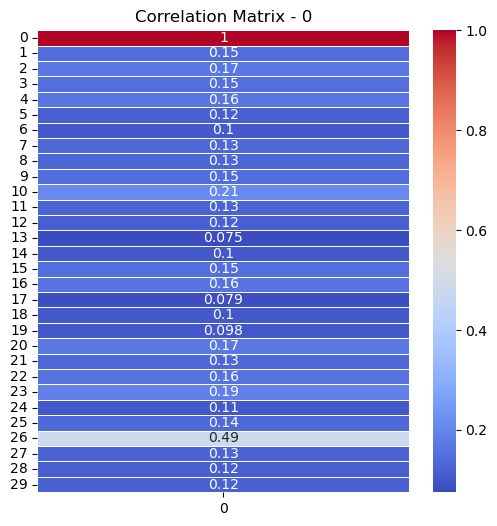

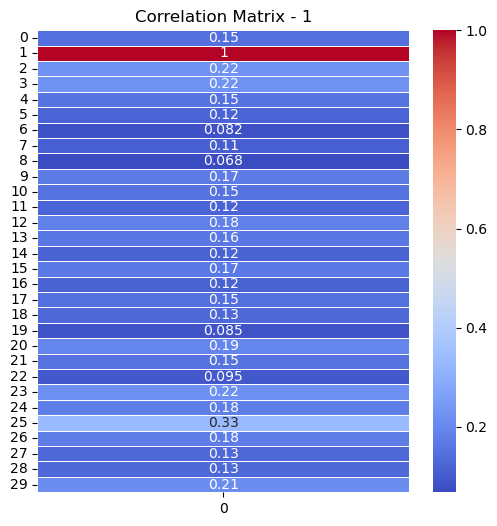

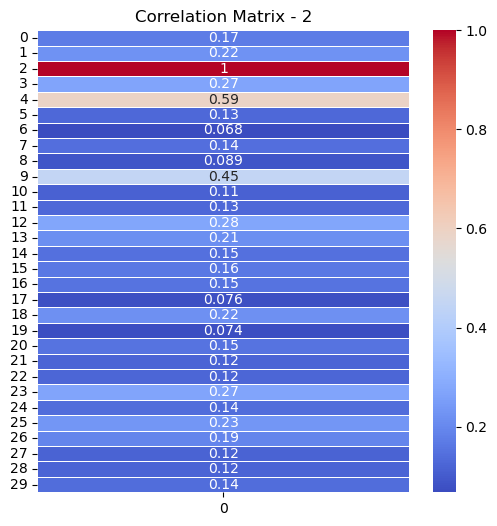

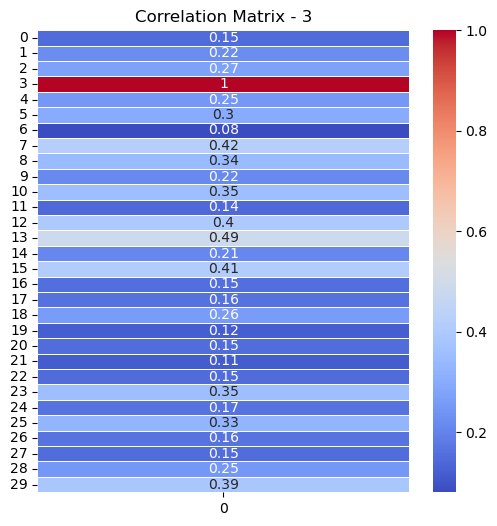

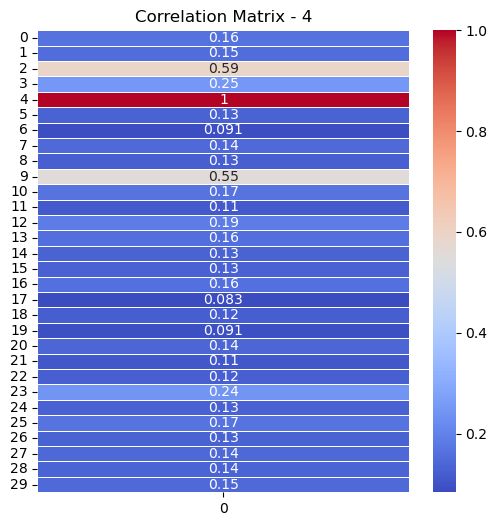

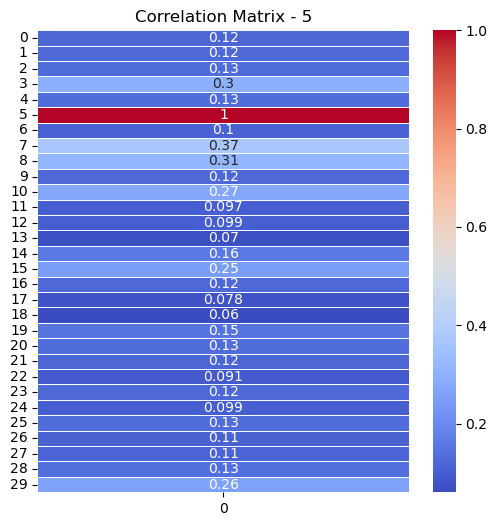

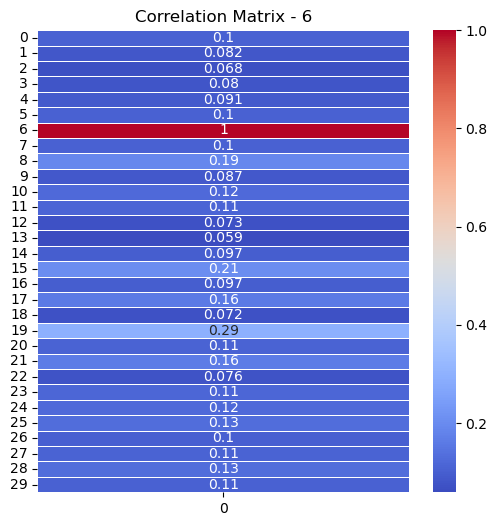

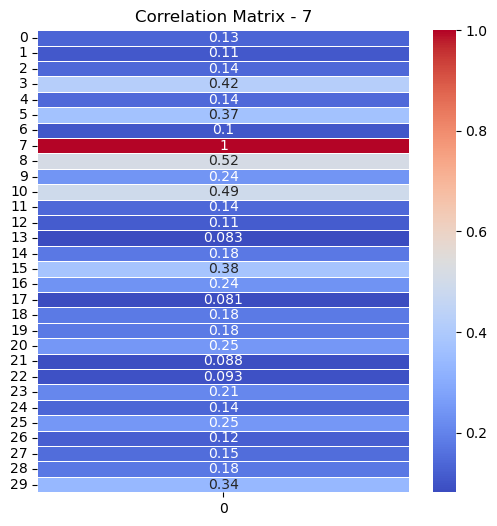

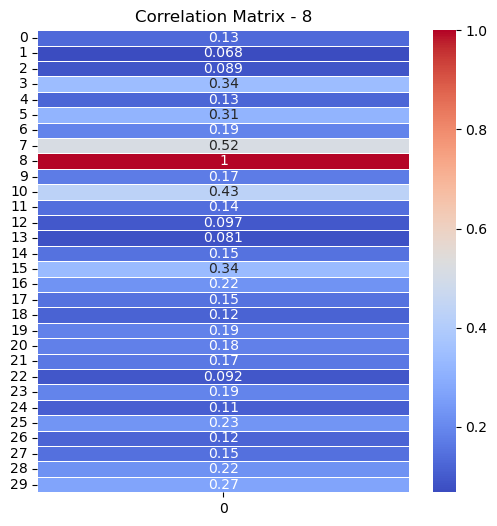

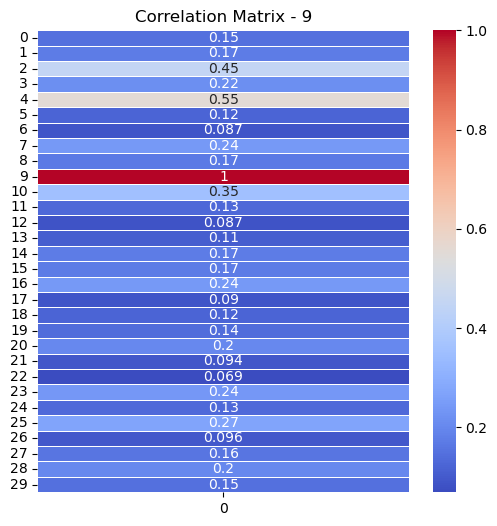

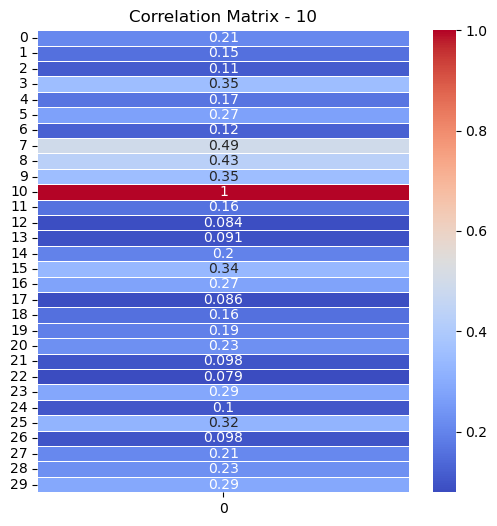

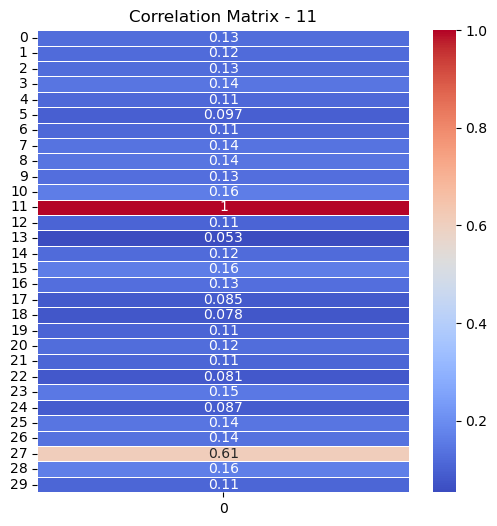

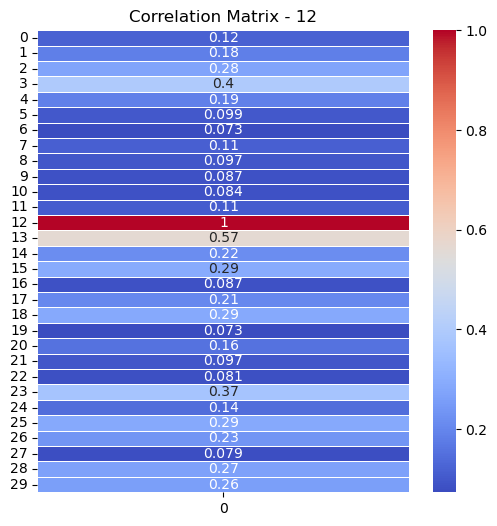

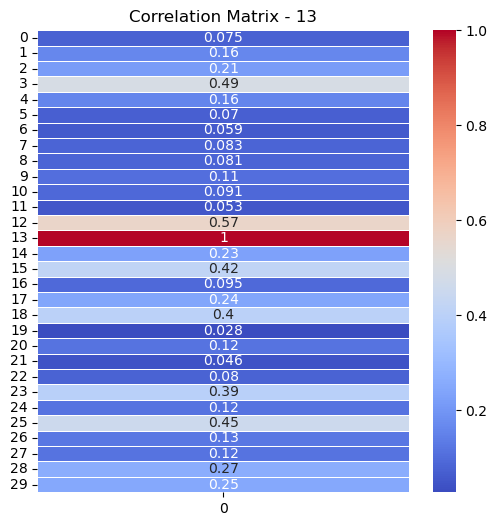

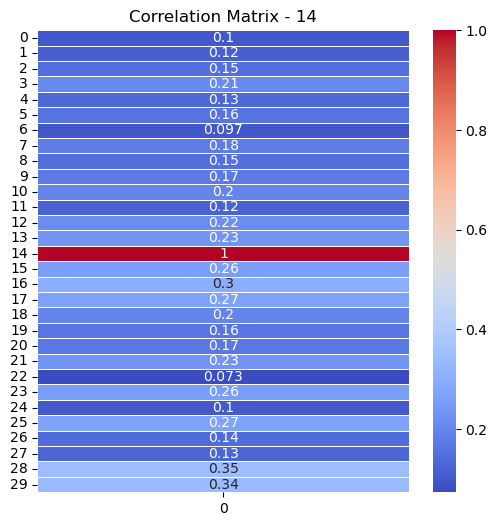

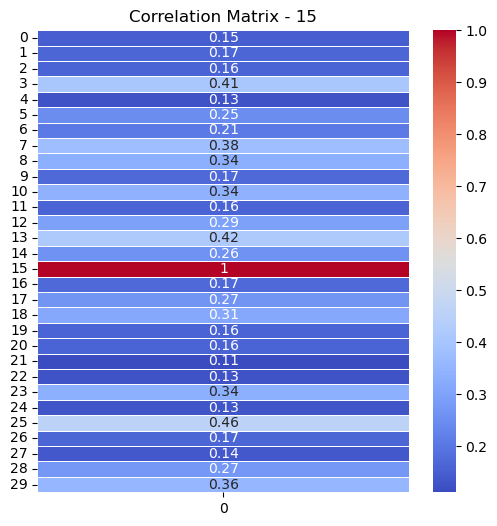

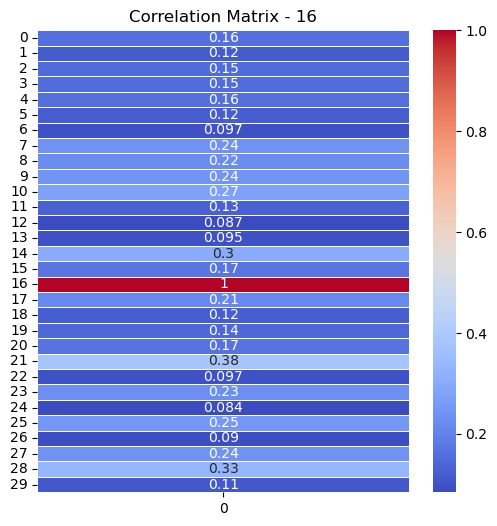

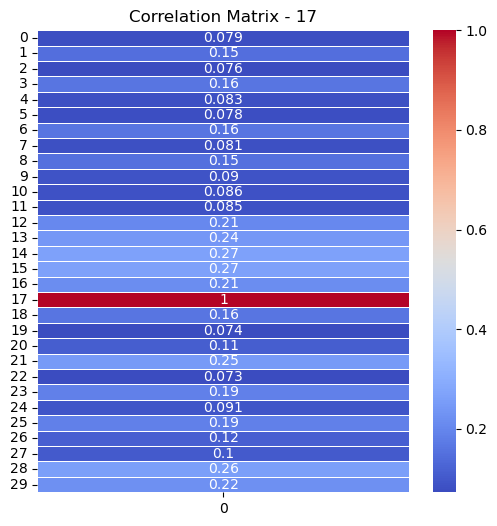

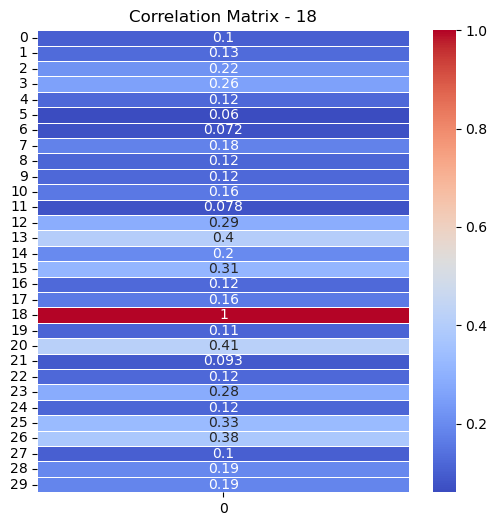

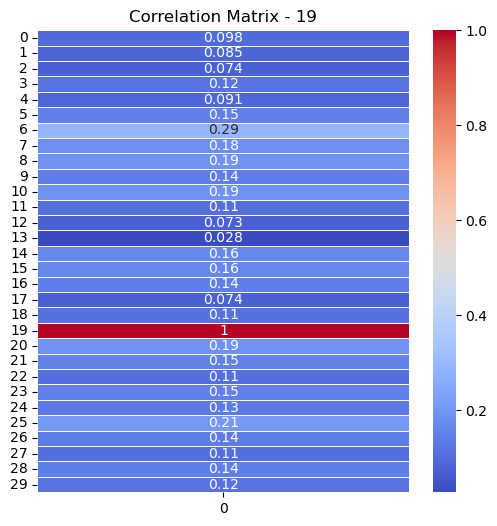

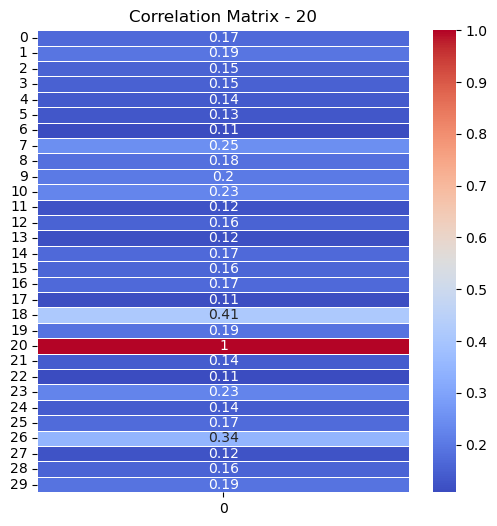

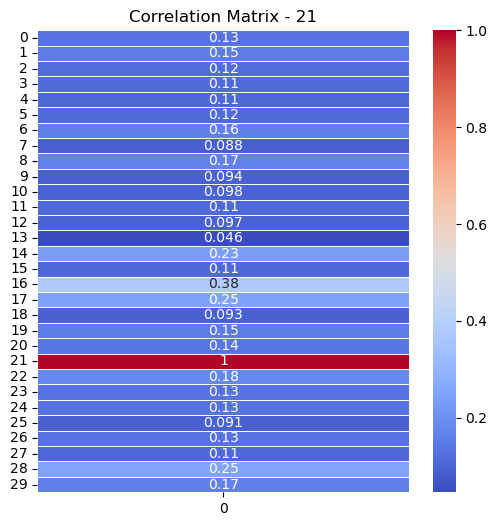

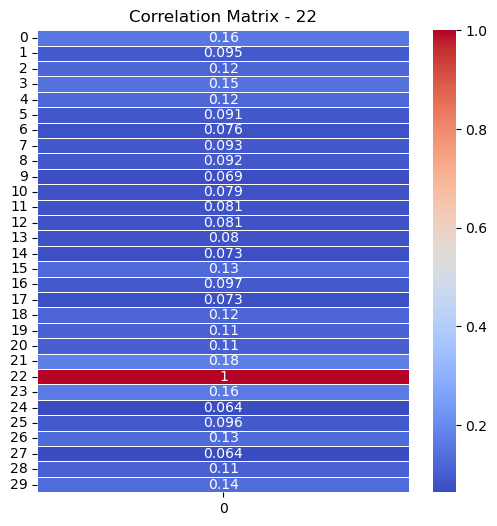

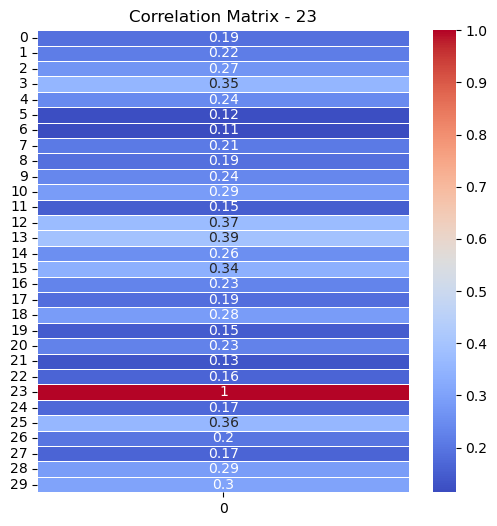

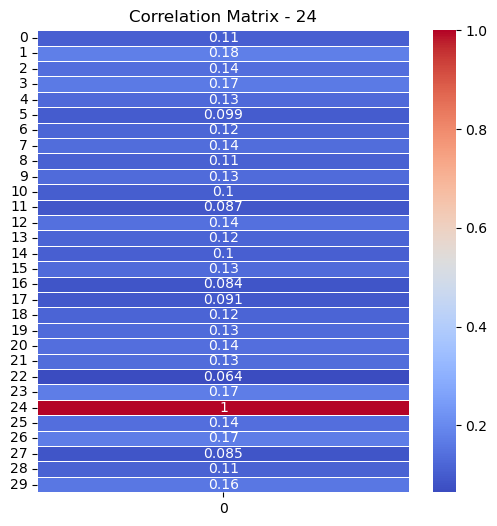

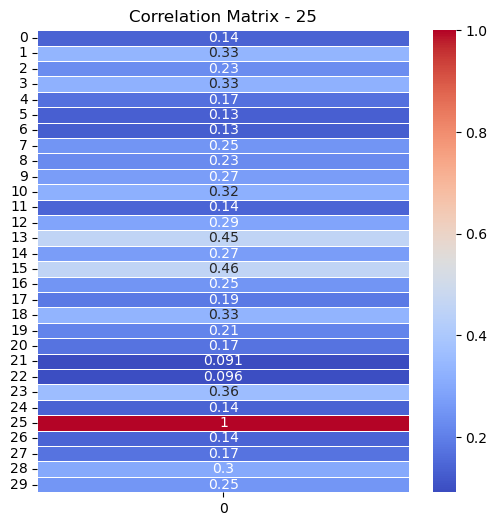

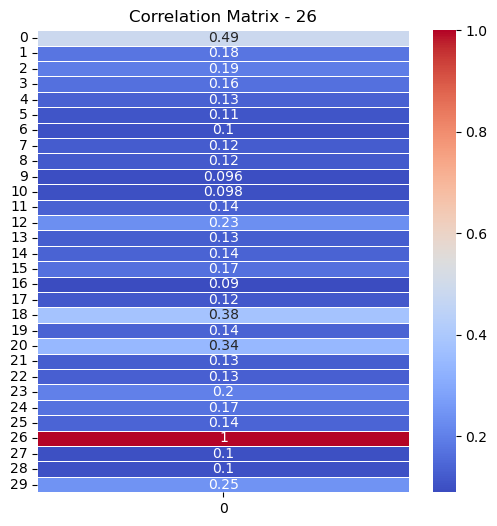

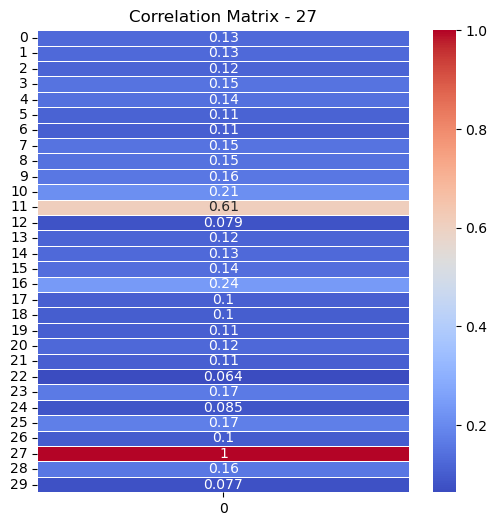

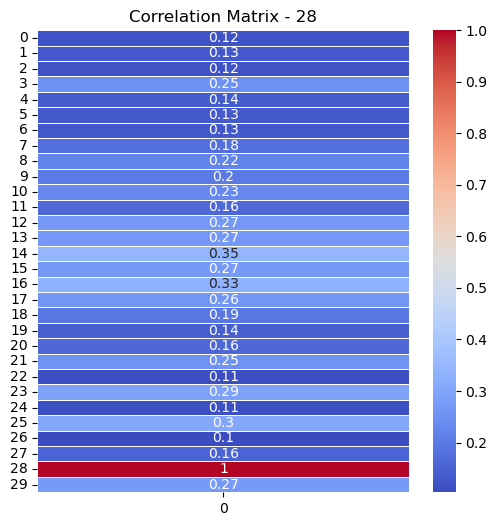

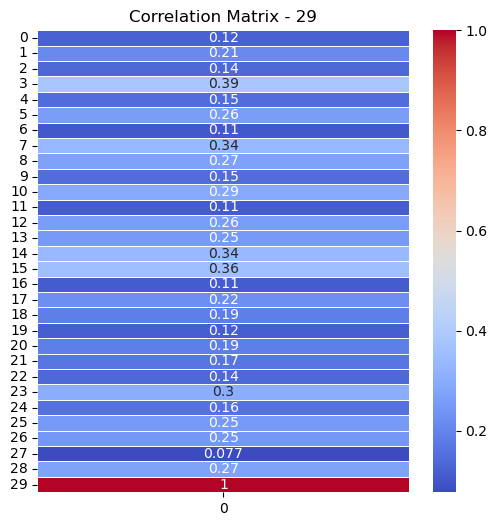

In [16]:
for data in range(len(cosine_sim)):
    plt.figure(figsize=(6, 6))
    plot = sns.heatmap(data=cosine_sim[data].reshape(len(txts),-1), annot=True, cmap='coolwarm', linewidths=0.5, )
    plt.title("Correlation Matrix - %d" % (data), size=12)
    plt.show()